## ***11. DECISION TREE***

#### 1] Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
heart=pd.read_csv('heart_disease.csv')

In [4]:
heart.shape

(999, 13)

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.6+ KB


#### 2] EDA

#### 3] Feature Engineering

In [6]:
heart.isnull().sum()

,0
age,91
sex,91
cp,91
trestbps,91
chol,91
fbs,91
restecg,91
thalch,91
exang,91
oldpeak,153


In [7]:
heart.duplicated().sum()

np.int64(90)

In [8]:

heart.drop_duplicates(inplace=True)

In [9]:
heart.shape

(909, 13)

In [10]:
heart.isnull().sum()

,0
age,1
sex,1
cp,1
trestbps,1
chol,1
fbs,1
restecg,1
thalch,1
exang,1
oldpeak,63


In [11]:
target=heart[['num']]
features=heart.drop(columns=['num'])

In [12]:
num_col=[ i for i in features.columns  if features[i].dtype!='O']
print(num_col)
cat_col=[ i for i in features.columns  if features[i].dtype=='O']
print(cat_col)

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [13]:
df1=features[cat_col]
df2=features[num_col]

<Axes: >

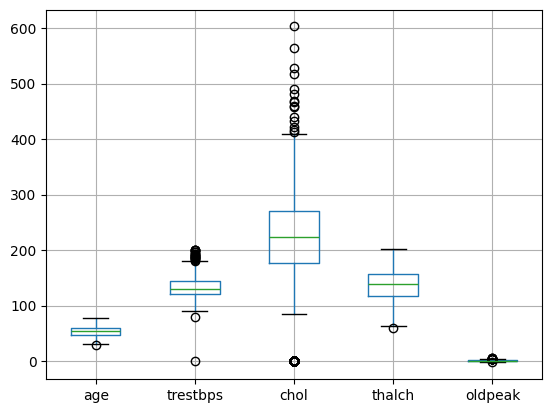

In [14]:
df2.boxplot()
#checking for outliers in num_col of oldpeak

In [15]:
ol_median=df2.oldpeak.median()
df2['oldpeak']=df2['oldpeak'].fillna(ol_median)
#as null values for oldpeak were high and they have outlier and continuous dtype replacing
#null values with median

/tmp/ipython-input-2759972521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['oldpeak']=df2['oldpeak'].fillna(ol_median)


In [16]:
df1.isnull().sum()
#checking for null values in cat_col of features

,0
sex,1
cp,1
fbs,1
restecg,1
exang,1
slope,1
thal,1


In [17]:
df1.dropna(inplace=True)
df1.shape

/tmp/ipython-input-136572652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


(908, 7)

In [18]:
#now checking for null values in num_col
df2.isnull().sum()
df2.dropna(inplace=True)
df2.shape

/tmp/ipython-input-70166366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


(908, 5)

In [19]:
heart['num'].value_counts()

,count
num,
0.0,399
1.0,265
2.0,109
3.0,107
4.0,28


In [20]:
target.isnull().sum()
target.dropna(inplace=True)
target.shape


/tmp/ipython-input-1072900743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.dropna(inplace=True)


(908, 1)

In [21]:
df2.dtypes

,0
age,float64
trestbps,float64
chol,float64
thalch,float64
oldpeak,float64


In [22]:
ord_enc=OrdinalEncoder()
df1=pd.DataFrame(ord_enc.fit_transform(df1),columns=cat_col)
df1.head()

,sex,cp,fbs,restecg,exang,slope,thal
0,1.0,3.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,3.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [23]:
lab=LabelEncoder()
target['num']=lab.fit_transform(target['num'])
target.head()

/tmp/ipython-input-1090351471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['num']=lab.fit_transform(target['num'])


,num
0,0
1,0
2,0
3,0
4,0


<Axes: >

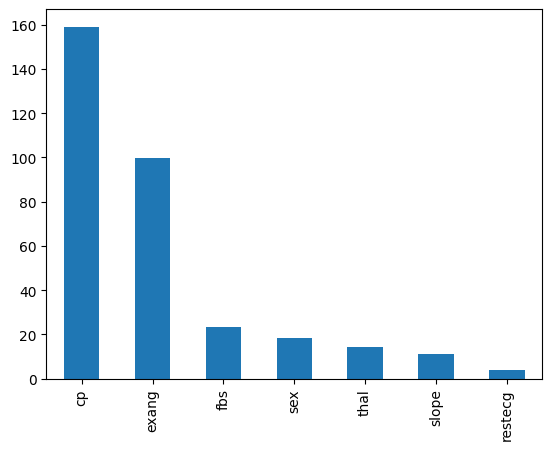

In [24]:
#feature Selection
from sklearn.feature_selection import chi2
chi=chi2(df1,target)
pd.Series(chi[0],index=df1.columns).sort_values(ascending=False).plot(kind='bar')

In [ ]:
df1.drop(columns=['restecg','slope','thal','sex'],inplace=True)
#dropping the columns which has lowest values /correlation with target

<Axes: >

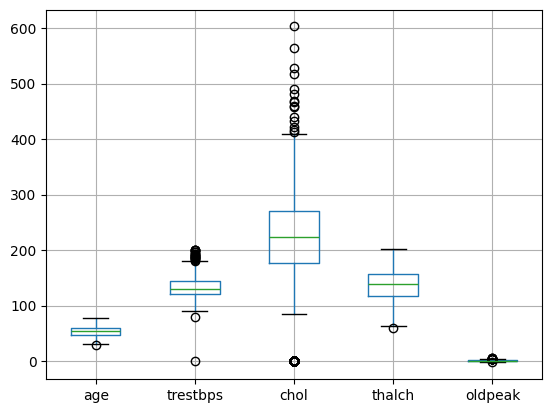

In [ ]:
df2.boxplot()

In [ ]:
def outlier_capping(df2,column):
  p=df2[column].quantile(0.99)
  p1=df2[column].quantile(0.01)
  df2[column]=df2[column].apply(lambda x:3*p if x>3*p else 3*p1 if x<3*p1 else x)
for col in df2.select_dtypes(["int","float"]).columns:
 outlier_capping(df2,col)


/tmp/ipython-input-1910844608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[column]=df2[column].apply(lambda x:3*p if x>3*p else 3*p1 if x<3*p1 else x)
/tmp/ipython-input-1910844608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[column]=df2[column].apply(lambda x:3*p if x>3*p else 3*p1 if x<3*p1 else x)
/tmp/ipython-input-1910844608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
df2.head()

,age,trestbps,chol,thalch,oldpeak
0,102.0,285.0,233.0,210.21,2.3
1,102.0,285.0,203.0,210.21,0.0
2,102.0,285.0,192.0,210.21,0.4
3,102.0,285.0,186.0,210.21,0.0
4,102.0,285.0,201.0,210.21,1.5


In [ ]:
target.shape


(908, 1)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0 1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


<Axes: >

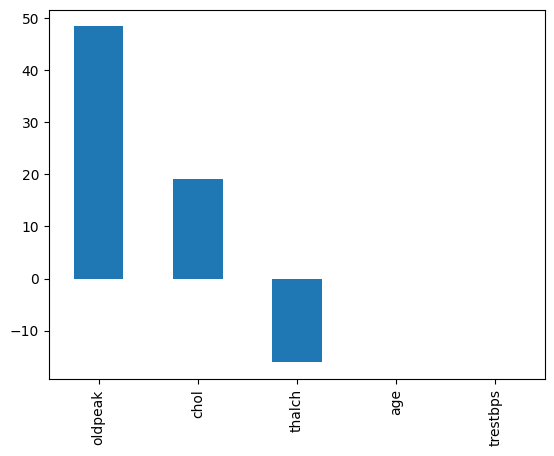

In [ ]:
# features has both discrete and continuous values hence using f_class for feature selection
from sklearn.feature_selection import f_classif
f=f_classif(df2,target)
pd.Series(f[0],index=df2.columns).sort_values(ascending=False).plot(kind='bar')


In [ ]:
df2.drop(columns=['thalch','age','trestbps'],inplace=True)
#again dropping columns with negative correlation and no correlation

/tmp/ipython-input-3669524293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['thalch','age','trestbps'],inplace=True)


In [ ]:
std=StandardScaler()
df2=pd.DataFrame(std.fit_transform(df2),columns=df2.columns)
features_new=pd.concat([df1,df2],axis=1)


In [ ]:
features_new.head()

,cp,fbs,exang,chol,oldpeak
0,3.0,1.0,0.0,0.281297,1.358768
1,1.0,0.0,0.0,0.013526,-0.821022
2,0.0,0.0,0.0,-0.084656,-0.441928
3,3.0,0.0,0.0,-0.138211,-0.821022
4,0.0,0.0,1.0,-0.004325,0.600580


In [ ]:
'''
Here we see that maximum correlation between oldpeak(ST depression induced by exercise relative to rest) ,
exang (exercise induced angina) , age and num (stages of heart disease) increase into this feature variable also
increase the possibility or presence of heart disease in the patient.
Similarly we can conclude for negative correlation that can be
observed, although typically not as strong as the positive ones for num.
For example, a negative correlation between thalch (maximum heart rate achieved) and
num might suggest that individuals with higher maximum heart rates achieved during
exercise tend to have a lower likelihood of heart disease, or vice-versa

'''
#

'\nHere we see that maximum correlation between oldpeak(ST depression induced by exercise relative to rest) ,\nexang (exercise induced angina) , age and num (stages of heart disease) increase into this feature variable also\nincrease the possibility or presence of heart disease in the patient.\nSimilarly we can conclude for negative correlation that can be\nobserved, although typically not as strong as the positive ones for num.\nFor example, a negative correlation between thalch (maximum heart rate achieved) and\nnum might suggest that individuals with higher maximum heart rates achieved during\nexercise tend to have a lower likelihood of heart disease, or vice-versa\n\n'

#### 4]Decision Tree Classification

In [ ]:
#splitting dataset into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(features_new,target,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 5)
(182, 5)
(726, 1)
(182, 1)


In [ ]:
x_train.head()

,cp,fbs,exang,chol,oldpeak
255,1.0,0.0,0.0,0.067080,-0.821022
189,1.0,1.0,0.0,-1.798388,-0.157608
423,0.0,0.0,1.0,0.424108,-0.821022
454,3.0,0.0,0.0,0.772209,-0.631475
637,0.0,0.0,0.0,0.040303,-0.821022


#### 5] Hyperparameter Tuning

In [ ]:
params={'criterion':['gini','entropy'],
        'splitter':['best','random'],
        'max_depth':range(1,15)}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(DecisionTreeClassifier(),params)
grid_search.fit(x_train,y_train)
grid_search.best_params_
#using grid search to get get best parameters for Decision Tree hyperparameters using gridSearch

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3,splitter='random')
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

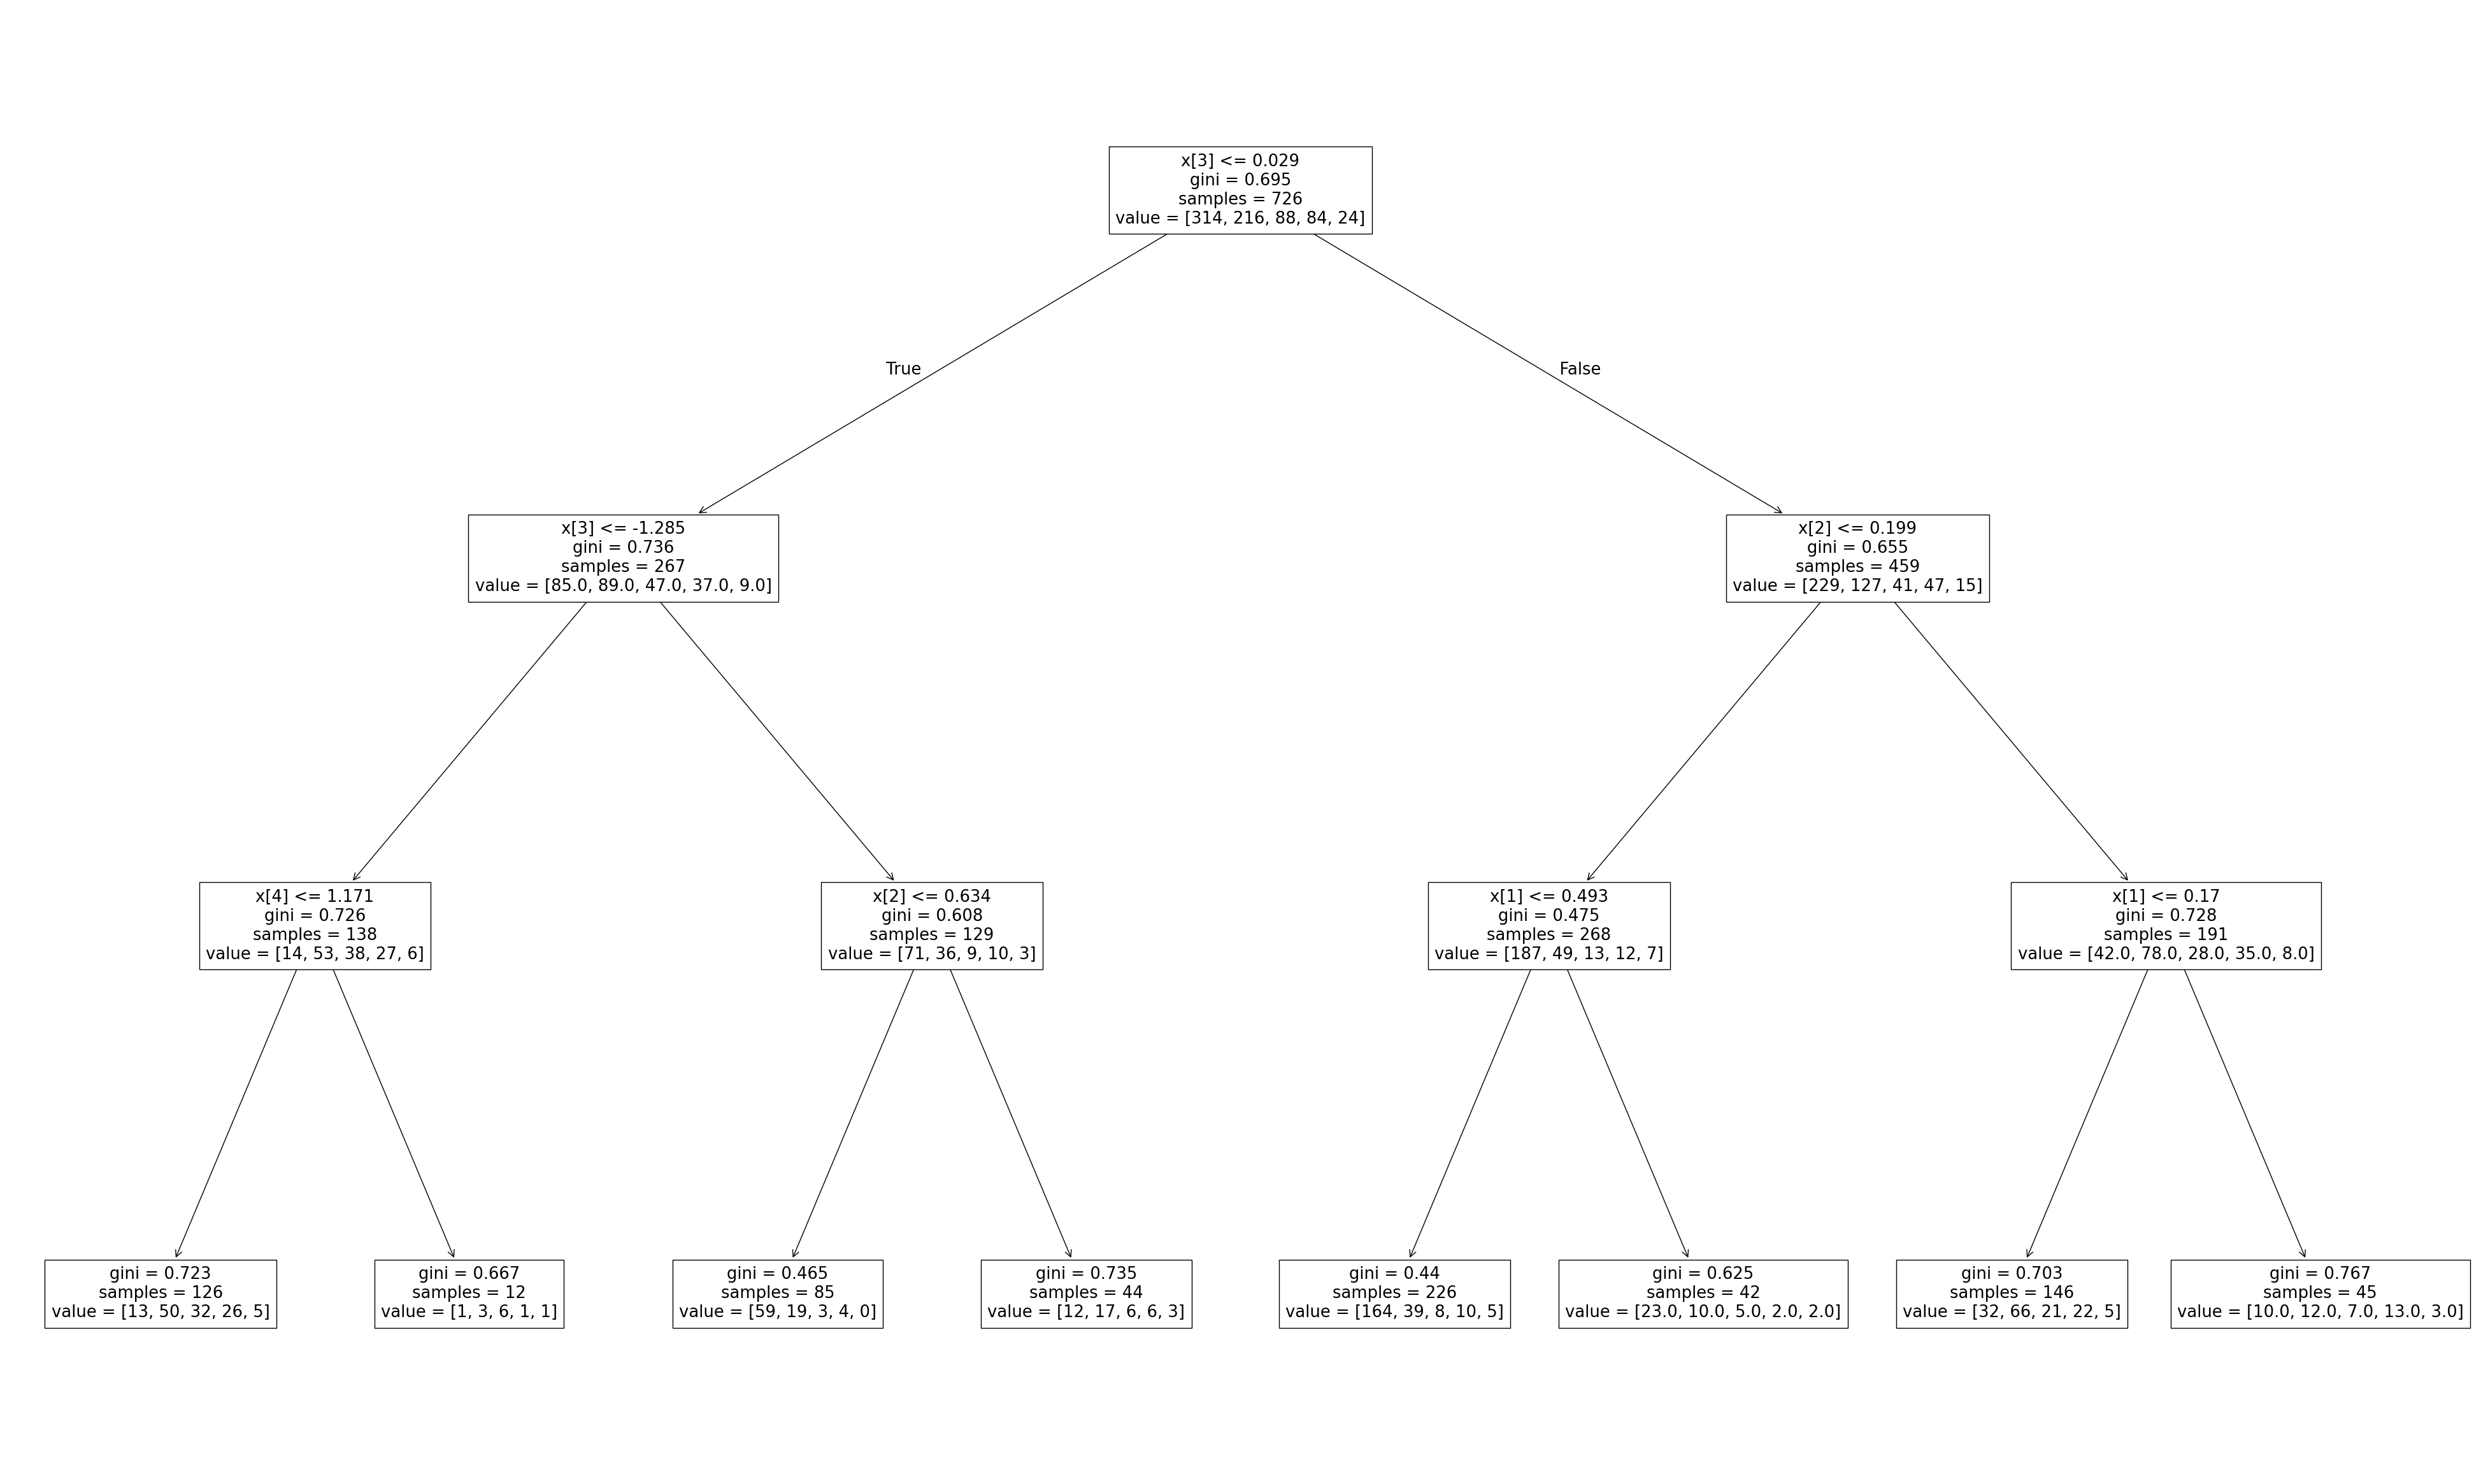

In [ ]:
#PLot the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(model)

plt.show()

In [ ]:
y_pred=model.predict(x_test)


In [ ]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        85
           1       0.38      0.63      0.47        49
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         4

    accuracy                           0.58       182
   macro avg       0.22      0.30      0.25       182
weighted avg       0.45      0.58      0.50       182

0.5769230769230769


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 6]Model Evaluation and Analysis

In [ ]:
'''
Precision: When the model predicted this class, how often was it correct?

For class 0.0 (likely 'no heart disease'): Precision is 0.72, meaning 72% of the time the model predicted '0.0', it was correct.
For class 1.0: Precision is 0.40, meaning 40% of the time the model predicted '1.0', it was correct.

Recall: Out of all the instances that actually belonged to this class, how many did the model correctly identify?

For class 0.0: Recall is 0.86, meaning the model found 86% of all actual '0.0' cases.
For class 1.0: Recall is 0.65, meaning the model found 65% of all actual '1.0' cases.

F1-score: This is the harmonic mean of precision and recall. It provides a single score that
balances both metrics.


Accuracy: The overall proportion of correct predictions across all classes.
This is the same value as returned by accuracy_score.



The model gives 58% accuracy i.e 58% it will provide correct prediction.
'''
'''
x[3] is the root node i.e chol
The dataset contains 726 samples.
The class distribution is uneven — class 0 dominates (314 samples).
The first split compares feature x[3] to 0.029.
Left (True): x[3] ≤ 0.029
Right (False): x[3] > 0.029
This is the most important split, chosen to reduce the overall class mixture


It further divides all items into two big groups:
Items with a small value of x[3]
Items with a larger value of x[3]
Each group is then split again based on other features, mainly:x[2],x[1]

This suggests x[3] has the strongest correlation with class labels.
Gini values are high in most nodes.
Leaves still contain multiple classes.This suggests the data is noisy or overlapping.

'''



'\nx[3] is the root node i.e chol\nThe dataset contains 726 samples.\nThe class distribution is uneven — class 0 dominates (314 samples).\nThe first split compares feature x[3] to 0.029.\nLeft (True): x[3] ≤ 0.029\nRight (False): x[3] > 0.029\nThis is the most important split, chosen to reduce the overall class mixture\n\n\nIt further divides all items into two big groups:\nItems with a small value of x[3]\nItems with a larger value of x[3]\nEach group is then split again based on other features, mainly:x[2],x[1]\n\nThis suggests x[3] has the strongest correlation with class labels.\nGini values are high in most nodes.\nLeaves still contain multiple classes.This suggests the data is noisy or overlapping.\n\n'

In [26]:
'''
INTERVIEW QUESTIONS:

1.
ANSWER:
A)max_depth: Sets the maximum number of levels the tree can grow.
Effect: A higher depth allows the model to capture complex patterns but significantly increases the risk of overfitting.
A lower depth reduces complexity and improves generalization but can lead to underfitting.

B)min_samples_split: The minimum number of samples required at an internal node before it can be further split.
Effect: Increasing this value prevents the tree from creating branches based on very few samples, acting as a regularization technique
to reduce overfitting.

C)min_samples_leaf: The minimum number of samples required to be in a terminal (leaf) node.
Effect: Higher values create larger, more stable leaves, which smooths the model and prevents it from learning noise or outliers.

D)max_leaf_nodes: Caps the total number of leaf nodes in the tree.
Effect: Restricts tree growth in a "best-first" fashion, promoting a simpler, more interpretable tree while limiting overfitting

E)max_features: Limits the number of features considered when looking for the best split at each node.
Effect: Reducing this number introduces randomness, which can help prevent overfitting and significantly speeds up training on
high-dimensional datasets.

2.
ANSWER:
Feature :	      Label Encoding	                                                                One-Hot Encoding

Representation:	Converts each category into a unique integer (e.g., Red=0, Green=1, Blue=2).  	Creates a new binary column (0 or 1) for every unique category.

Dimensionality:	Does not change dimensionality; keeps everything in one column.	                Increases dimensionality, adding one new column per category.

Data Type:     	Best for Ordinal data 	                                                        Best for Nominal data (categories with no order, like Color or City names).
                (categories with a natural rank, like Small < Medium < Large).

Model Risk:   	May mislead models into assuming a mathematical order (e.g., Blue > Red)       	Can lead to high dimensionality and sparse data if there are many unique categories.
                where none exists
                '''


'\nINTERVIEW QUESTIONS:\n\n1.\nANSWER:\nA)max_depth: Sets the maximum number of levels the tree can grow.\nEffect: A higher depth allows the model to capture complex patterns but significantly increases the risk of overfitting. \nA lower depth reduces complexity and improves generalization but can lead to underfitting.\n\nB)min_samples_split: The minimum number of samples required at an internal node before it can be further split.\nEffect: Increasing this value prevents the tree from creating branches based on very few samples, acting as a regularization technique\nto reduce overfitting.\n\nC)min_samples_leaf: The minimum number of samples required to be in a terminal (leaf) node.\nEffect: Higher values create larger, more stable leaves, which smooths the model and prevents it from learning noise or outliers.\n\nD)max_leaf_nodes: Caps the total number of leaf nodes in the tree.\nEffect: Restricts tree growth in a "best-first" fashion, promoting a simpler, more interpretable tree while